AttributeError: FillBetweenPolyCollection.set() got an unexpected keyword argument 'bins'

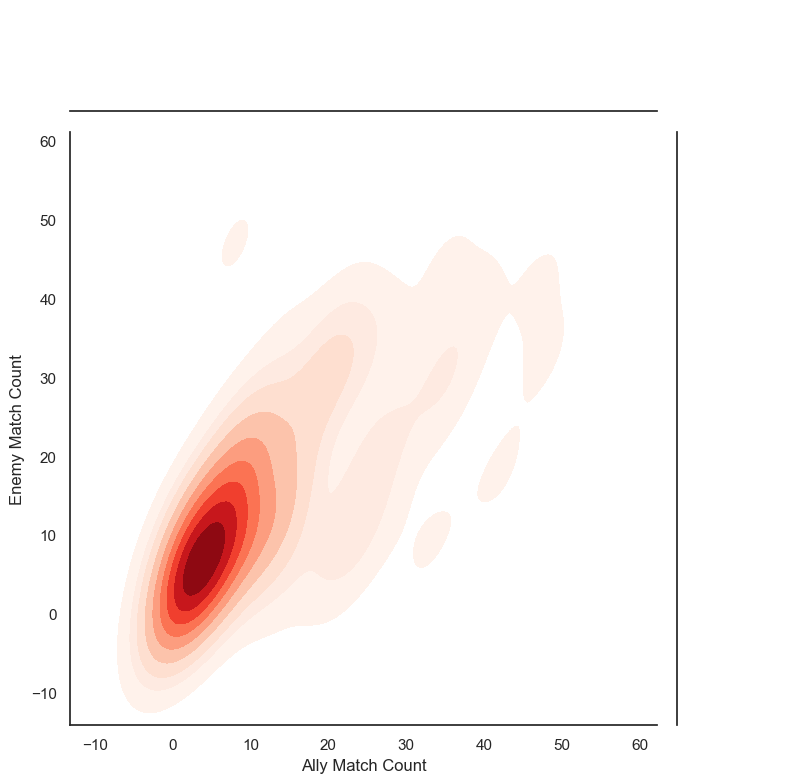

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file containing hero match data
csv_file = "hero_win_percentages.csv"  # Replace with the actual path to your CSV file
data = pd.read_csv(csv_file)

# Extract ally and enemy match counts
ally_match_counts = data['Ally Matches']
enemy_match_counts = data['Enemy Matches']

# Create a DataFrame for visualization
match_data = pd.DataFrame({
    'Ally Match Count': ally_match_counts,
    'Enemy Match Count': enemy_match_counts
})

# Create the KDE plot with marginal histograms
sns.set(style="white")
g = sns.jointplot(
    data=match_data,
    x='Ally Match Count',
    y='Enemy Match Count',
    kind='kde',  # Kernel density estimation for the plot
    fill=True,   # Fill the density contours
    cmap="Reds",  # Color map for density
    height=8,    # Set figure height
    marginal_kws={'bins': 20, 'fill': True, 'color': 'red'}  # Style for marginal histograms
)

# Add titles and labels
g.set_axis_labels("Ally Match Number Distribution", "Enemy Match Number Distribution", fontsize=12)
g.fig.suptitle("Match Distribution of Ally and Enemy Heroes", fontsize=16, y=1.02)

# Display the plot
plt.show()


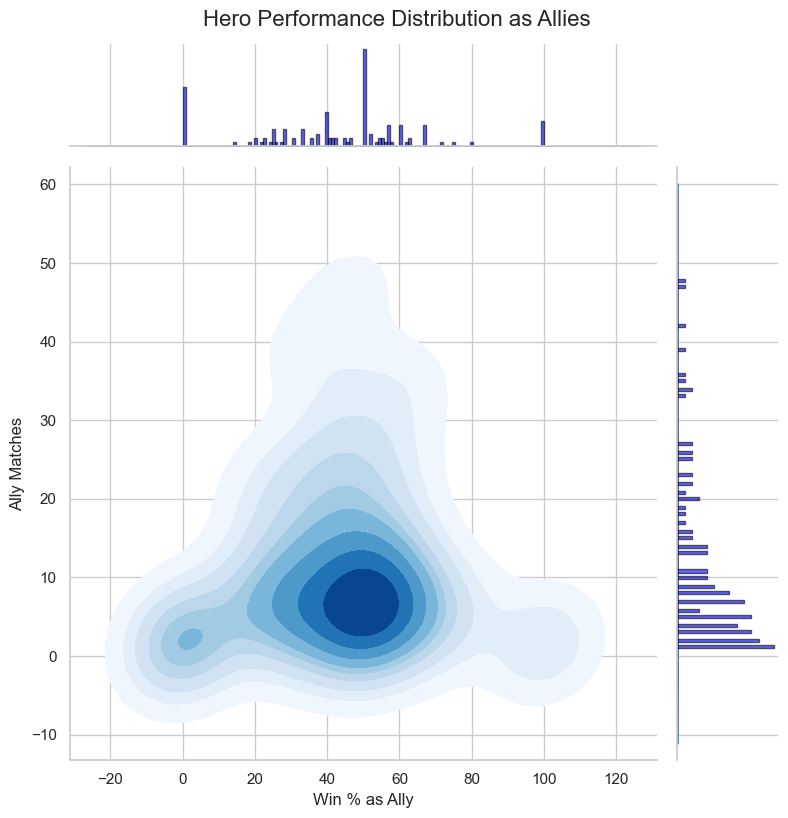

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file containing ally data
csv_file = "hero_win_percentages.csv"  # Replace with the actual path to your CSV file
data = pd.read_csv(csv_file)

# Sort hero IDs by win percentage and match counts for allies
data_sorted = data.sort_values(by=['Win % as Ally', 'Ally Matches'], ascending=False)

# Create a DataFrame for visualization
ally_data = pd.DataFrame({
    'Hero ID': data_sorted['Hero ID'],
    'Win % as Ally': data_sorted['Win % as Ally'],
    'Ally Matches': data_sorted['Ally Matches']
})

# Calculate the number of unique Hero IDs (used for bins)
num_hero_ids = ally_data['Hero ID'].nunique()

# Create the jointplot with KDE for the main plot and histograms for marginal plots
sns.set(style="whitegrid")
g = sns.jointplot(
    data=ally_data,
    x='Win % as Ally',
    y='Ally Matches',
    kind='kde',  # Kernel density estimation for the main plot
    fill=True,
    cmap="Blues",  # Color map
    height=8  # Set figure height
)

# Add histograms manually for marginal plots
g.ax_marg_x.hist(ally_data['Win % as Ally'], bins=num_hero_ids, color='blue', alpha=0.6, edgecolor='black')
g.ax_marg_y.hist(ally_data['Ally Matches'], bins=num_hero_ids, orientation='horizontal', color='blue', alpha=0.6, edgecolor='black')

# Add titles and labels
g.set_axis_labels("Win % as Ally", "Ally Matches", fontsize=12)
g.fig.suptitle("Hero Performance Distribution as Allies", fontsize=16, y=1.02)

# Display the plot
plt.show()


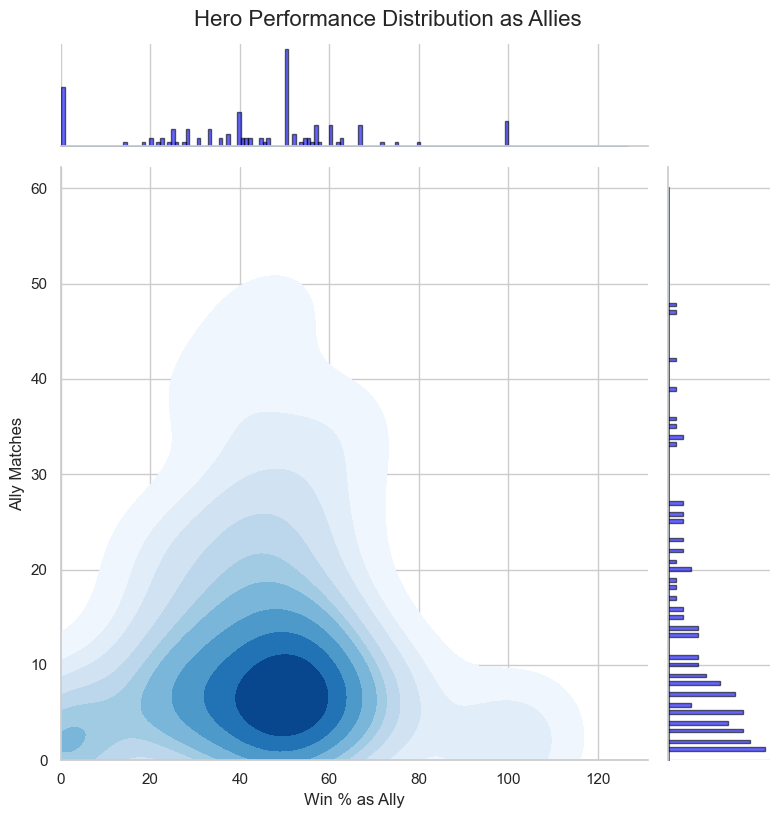

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file containing ally data
csv_file = "hero_win_percentages.csv"  # Replace with the actual path to your CSV file
data = pd.read_csv(csv_file)

# Sort hero IDs by win percentage and match counts for allies
data_sorted = data.sort_values(by=['Win % as Ally', 'Ally Matches'], ascending=False)

# Create a DataFrame for visualization
ally_data = pd.DataFrame({
    'Hero ID': data_sorted['Hero ID'],
    'Win % as Ally': data_sorted['Win % as Ally'],
    'Ally Matches': data_sorted['Ally Matches']
})

# Calculate the number of unique Hero IDs (used for bins)
num_hero_ids = ally_data['Hero ID'].nunique()

# Create the jointplot with KDE for the main plot and histograms for marginal plots
sns.set(style="whitegrid")
g = sns.jointplot(
    data=ally_data,
    x='Win % as Ally',
    y='Ally Matches',
    kind='kde',  # Kernel density estimation for the main plot
    fill=True,
    cmap="Blues",  # Color map
    height=8  # Set figure height
)

# Add histograms manually for marginal plots
g.ax_marg_x.hist(ally_data['Win % as Ally'], bins=num_hero_ids, color='blue', alpha=0.6, edgecolor='black')
g.ax_marg_y.hist(ally_data['Ally Matches'], bins=num_hero_ids, orientation='horizontal', color='blue', alpha=0.6, edgecolor='black')

# Set axis limits to ensure they start at 0
g.ax_joint.set_xlim(left=0)  # Set x-axis to start at 0
g.ax_joint.set_ylim(bottom=0)  # Set y-axis to start at 0

# Add titles and labels
g.set_axis_labels("Win % as Ally", "Ally Matches", fontsize=12)
g.fig.suptitle("Hero Performance Distribution as Allies", fontsize=16, y=1.02)

# Display the plot
plt.show()
